Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   visit_id     3000 non-null   object        
 1   patient_id   3000 non-null   object        
 2   visit_date   3000 non-null   datetime64[ns]
 3   systolic_bp  3000 non-null   int64         
 4   ecg_result   3000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 117.3+ KB
None
-----------------------------------------------------------------------------

Summary Statistics:
                       visit_date  systolic_bp
count                        3000  3000.000000
mean   2020-06-16 04:04:19.200000   145.140000
min           2015-01-01 00:00:00    90.000000
25%           2017-08-28 12:00:00   117.000000
50%           2020-06-22 12:00:00   145.000000
75%           2023-03-10 00:00:00   173.000000
max           2025-12-30 00:00:00  

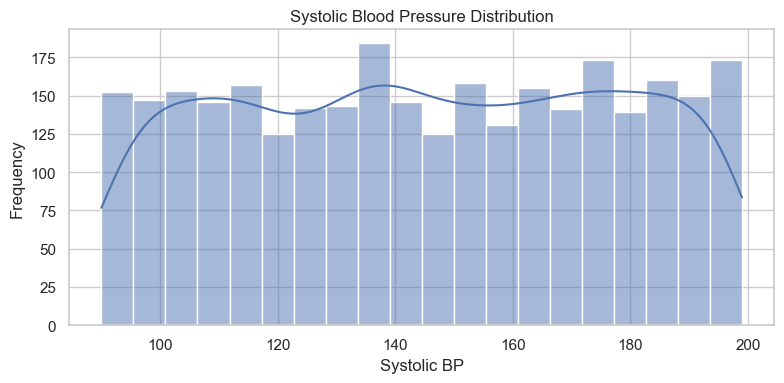

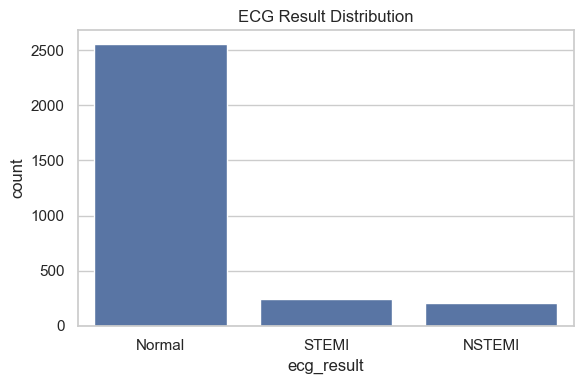

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("visits.csv")

# Convert visit_date to datetime
df['visit_date'] = pd.to_datetime(df['visit_date'])

# Define the analysis class
class VisitDataAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe

    def basic_info(self):
        print("Basic Info:")
        print(self.df.info())
        print("-----------------------------------------------------------------------------")

    def summary_stats(self):
        print("\nSummary Statistics:")
        print(self.df.describe())
        print("-----------------------------------------------------------------------------")

    def missing_values(self):
        print("\nMissing Values:")
        print(self.df.isnull().sum())
        print("-----------------------------------------------------------------------------")

    def unique_patients(self):
        print("\nUnique Patients:", self.df['patient_id'].nunique())
        print("-----------------------------------------------------------------------------")

    def unique_visits(self):
        print("Unique Visits:", self.df['visit_id'].nunique())
        print("-----------------------------------------------------------------------------")

    def ecg_distribution(self):
        print("\nECG Result Distribution:")
        print(self.df['ecg_result'].value_counts())
        print("-----------------------------------------------------------------------------")

    def avg_bp(self):
        print("\nAverage Systolic BP:", self.df['systolic_bp'].mean())
        print("-----------------------------------------------------------------------------")

    def bp_stats(self):
        print("\nSystolic BP Stats:")
        print("Mean:", self.df['systolic_bp'].mean())
        print("Median:", self.df['systolic_bp'].median())
        print("Mode:", self.df['systolic_bp'].mode()[0])
        print("-----------------------------------------------------------------------------")

    def plot_bp_histogram(self):
        plt.figure(figsize=(8, 4))
        sns.histplot(self.df['systolic_bp'], bins=20, kde=True)
        plt.title('Systolic Blood Pressure Distribution')
        plt.xlabel('Systolic BP')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    def plot_ecg_bar(self):
        plt.figure(figsize=(6, 4))
        sns.countplot(data=self.df, x='ecg_result', order=self.df['ecg_result'].value_counts().index)
        plt.title('ECG Result Distribution')
        plt.tight_layout()
        plt.show()

# Create instance and perform analysis
analyzer = VisitDataAnalysis(df)

# Run 15+ functions
analyzer.basic_info()
analyzer.summary_stats()
analyzer.missing_values()
analyzer.unique_patients()
analyzer.unique_visits()
analyzer.ecg_distribution()
analyzer.avg_bp()
analyzer.bp_stats()
analyzer.plot_bp_histogram()
analyzer.plot_ecg_bar()


In [2]:
import pandas as pd

class PatientAnalysis:
    def __init__(self, file):
        self.data = pd.read_csv(file)
        self.patient_col = None
        self.date_col = None
        self.setup_columns()
        self.prepare_data()

    def setup_columns(self):
        # Try to detect column names
        for col in ['PatientID', 'patient_id', 'ID']:
            if col in self.data.columns:
                self.patient_col = col
                break
        for col in ['VisitDate', 'visit_date', 'Date']:
            if col in self.data.columns:
                self.date_col = col
                break
        if not self.patient_col or not self.date_col:
            raise Exception("PatientID or VisitDate column not found.")

    def prepare_data(self):
        # Convert date and extract year
        self.data[self.date_col] = pd.to_datetime(self.data[self.date_col], errors='coerce')
        self.data['Year'] = self.data[self.date_col].dt.year

    def visits_per_patient(self):
        result = self.data[self.patient_col].value_counts().reset_index()
        result.columns = ['PatientID', 'VisitCount']
        return result

    def year_with_most_visits(self):
        result = self.data['Year'].value_counts().reset_index()
        result.columns = ['Year', 'VisitCount']
        return result.iloc[0]

    def sorted_data(self):
        return self.data.sort_values(by=self.date_col)

    def patients_per_year(self):
        result = self.data.groupby('Year')[self.patient_col].nunique().reset_index()
        result.columns = ['Year', 'Patients']
        return result

    def show_results(self):
        print(" Visits per patient:\n", self.visits_per_patient())
        print("\n Year with most visits:\n", self.year_with_most_visits())
        print("\n Sorted data:\n", self.sorted_data())
        print("\n Patients per year:\n", self.patients_per_year())


# Run everything
if __name__ == "__main__":
    analysis = PatientAnalysis("visits.csv")
    analysis.show_results()


 Visits per patient:
      PatientID  VisitCount
0        P0138           9
1        P0895           8
2        P0219           8
3        P1078           8
4        P0922           8
...        ...         ...
1085     P0503           1
1086     P1054           1
1087     P0599           1
1088     P0180           1
1089     P0610           1

[1090 rows x 2 columns]

 Year with most visits:
 Year          2017
VisitCount     286
Name: 0, dtype: int64

 Sorted data:
      visit_id patient_id visit_date  systolic_bp ecg_result  Year
2859    V2860      P0285 2015-01-01          182     Normal  2015
2794    V2795      P0537 2015-01-04          187     Normal  2015
440     V0441      P0884 2015-01-04          138     Normal  2015
1354    V1355      P1020 2015-01-05          172      STEMI  2015
1224    V1225      P0862 2015-01-05          149     Normal  2015
...       ...        ...        ...          ...        ...   ...
2691    V2692      P0174 2025-12-22          163      STEMI  2025

In [3]:
import pandas as pd

def count_repeated_patients(df, date_col='visit_date', id_col='patient_id'):
    # Convert date column to datetime
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.dropna(subset=[date_col])
    
    # Extract year
    df['Year'] = df[date_col].dt.year
    
    # Count how many unique years each patient visited
    patient_years = df.groupby(id_col)['Year'].nunique().reset_index()
    
    # Filter patients who visited in more than 1 year
    repeated_patients = patient_years[patient_years['Year'] > 1]
    
    # Return total repeated patients
    return repeated_patients.shape[0]

# Example usage
df = pd.read_csv("visits.csv")
total = count_repeated_patients(df)
print(f"Total repeated patients (visited in more than 1 year): {total}")

Total repeated patients (visited in more than 1 year): 832


C:\Users\ISHITA AGARWAL\AppData\Local\Temp\ipykernel_10096\20996726.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\ISHITA AGARWAL\AppData\Local\Temp\ipykernel_10096\20996726.py:23: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ISHITA AGARWAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


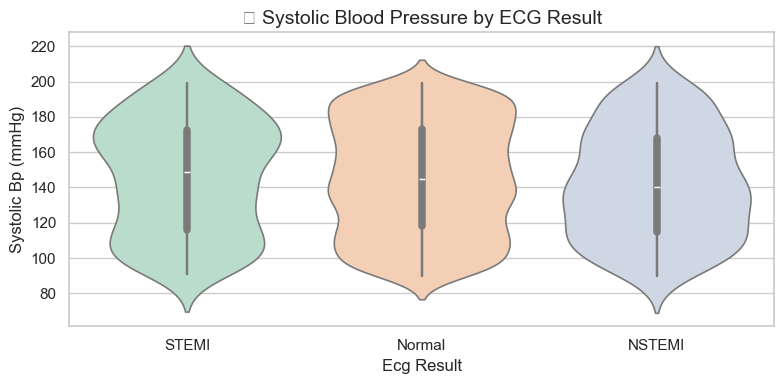

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class HealthPlotter:
    def __init__(self, data):
        self.data = data
        sns.set(style="whitegrid")  # Apply seaborn styling once

    def plot_violin_bp_by_ecg(self, x_col='ecg_result', y_col='systolic_bp'):
        plt.figure(figsize=(8, 4))
        sns.violinplot(
            data=self.data,
            x=x_col,
            y=y_col,
            palette='Pastel2',
            inner='box',
            linewidth=1.2
        )
        plt.title('🩺 Systolic Blood Pressure by ECG Result', fontsize=14)
        plt.xlabel(x_col.replace('_', ' ').title(), fontsize=12)
        plt.ylabel(y_col.replace('_', ' ').title() + ' (mmHg)', fontsize=12)
        plt.tight_layout()
        plt.show()


# Example usage:
if __name__ == "__main__":
    df = pd.read_csv("visits.csv")  # Replace with your actual file
    plotter = HealthPlotter(df)
    plotter.plot_violin_bp_by_ecg()


C:\Users\ISHITA AGARWAL\AppData\Local\Temp\ipykernel_10096\2960562501.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\ISHITA AGARWAL\AppData\Local\Temp\ipykernel_10096\2960562501.py:23: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ISHITA AGARWAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


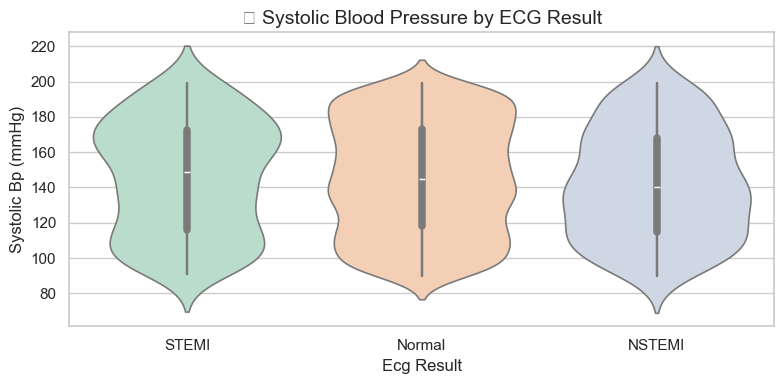

C:\Users\ISHITA AGARWAL\AppData\Local\Temp\ipykernel_10096\2960562501.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


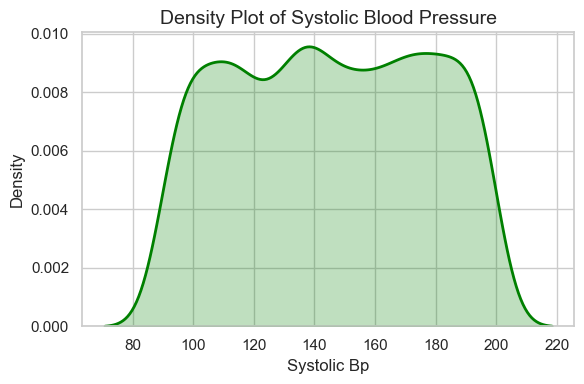

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class HealthPlotter:
    def __init__(self, data):
        self.data = data
        sns.set(style="whitegrid")  # Apply seaborn styling once

    def plot_violin_bp_by_ecg(self, x_col='ecg_result', y_col='systolic_bp'):
        plt.figure(figsize=(8, 4))
        sns.violinplot(
            data=self.data,
            x=x_col,
            y=y_col,
            palette='Pastel2',
            inner='box',
            linewidth=1.2
        )
        plt.title('🩺 Systolic Blood Pressure by ECG Result', fontsize=14)
        plt.xlabel(x_col.replace('_', ' ').title(), fontsize=12)
        plt.ylabel(y_col.replace('_', ' ').title() + ' (mmHg)', fontsize=12)
        plt.tight_layout()
        plt.show()

    def plot_kde_systolic_bp(self, col='systolic_bp', color='green'):
        plt.figure(figsize=(6, 4))
        sns.kdeplot(
            data=self.data,
            x=col,
            shade=True,
            color=color,
            linewidth=2
        )
        plt.title("Density Plot of Systolic Blood Pressure", fontsize=14)
        plt.xlabel(col.replace('_', ' ').title(), fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.tight_layout()
        plt.show()


# Example usage
if __name__ == "__main__":
    df = pd.read_csv("visits.csv")  # Replace with your actual file
    plotter = HealthPlotter(df)
    
    # Plot violin chart
    plotter.plot_violin_bp_by_ecg()
    
    # Plot KDE density chart
    plotter.plot_kde_systolic_bp()


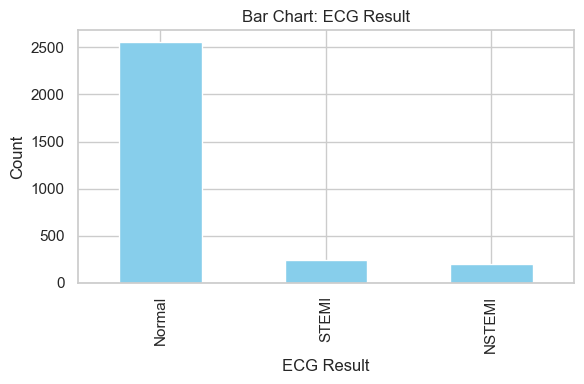

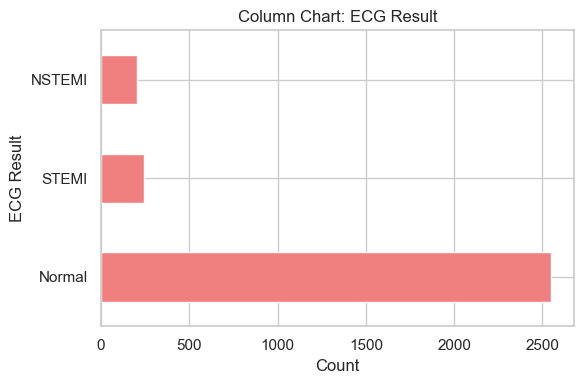

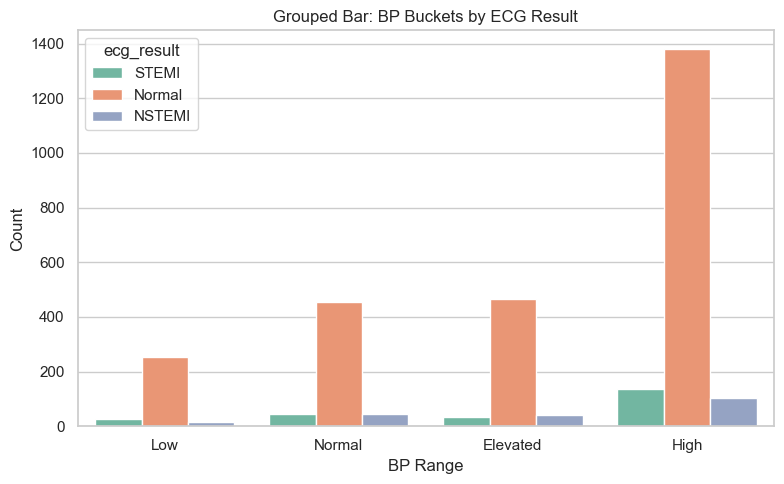

C:\Users\ISHITA AGARWAL\AppData\Local\Temp\ipykernel_10096\594153358.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=self.data, x='ecg_result', y='systolic_bp', jitter=True, palette='Set1')


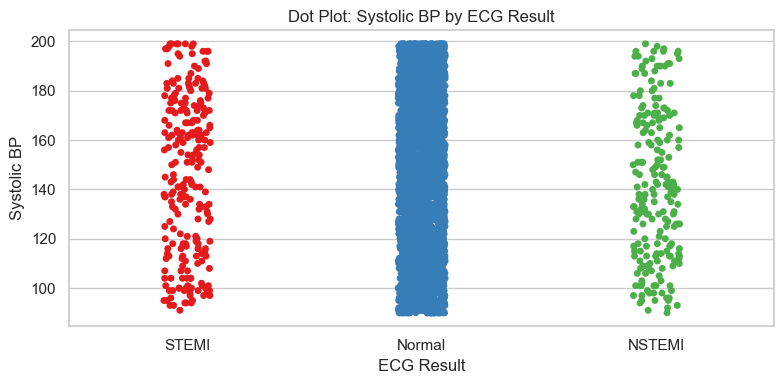

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class ECGVisualizer:
    def __init__(self, data):
        self.data = data
        sns.set(style="whitegrid")

    def bar_chart_ecg_frequency(self):
        plt.figure(figsize=(6, 4))
        self.data['ecg_result'].value_counts().plot(kind='bar', color='skyblue')
        plt.title("Bar Chart: ECG Result")
        plt.xlabel("ECG Result")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    def column_chart_ecg_frequency(self):
        plt.figure(figsize=(6, 4))
        self.data['ecg_result'].value_counts().plot(kind='barh', color='lightcoral')
        plt.title("Column Chart: ECG Result")
        plt.xlabel("Count")
        plt.ylabel("ECG Result")
        plt.tight_layout()
        plt.show()

    def grouped_bar_bp_bucket_by_ecg(self):
        # Create blood pressure buckets
        self.data['bp_bucket'] = pd.cut(
            self.data['systolic_bp'],
            bins=[0, 100, 120, 140, 200],
            labels=["Low", "Normal", "Elevated", "High"]
        )
        plt.figure(figsize=(8, 5))
        sns.countplot(data=self.data, x='bp_bucket', hue='ecg_result', palette='Set2')
        plt.title("Grouped Bar: BP Buckets by ECG Result")
        plt.xlabel("BP Range")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    def dot_plot_bp_by_ecg(self):
        plt.figure(figsize=(8, 4))
        sns.stripplot(data=self.data, x='ecg_result', y='systolic_bp', jitter=True, palette='Set1')
        plt.title("Dot Plot: Systolic BP by ECG Result")
        plt.xlabel("ECG Result")
        plt.ylabel("Systolic BP")
        plt.tight_layout()
        plt.show()


# Example usage
if __name__ == "__main__":
    df = pd.read_csv("visits.csv")  # Replace with your actual file
    plotter = ECGVisualizer(df)

    plotter.bar_chart_ecg_frequency()
    plotter.column_chart_ecg_frequency()
    plotter.grouped_bar_bp_bucket_by_ecg()
    plotter.dot_plot_bp_by_ecg()


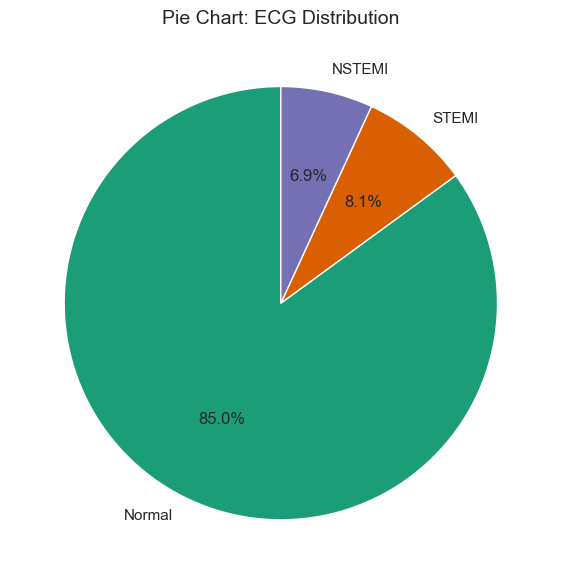

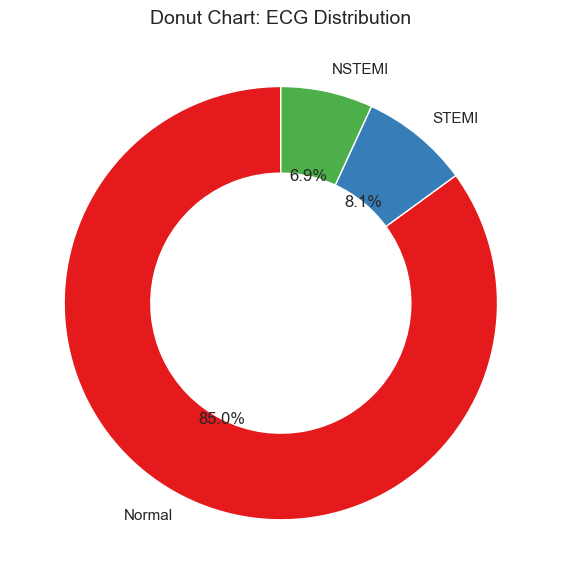

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

class ECGPieCharts:
    def __init__(self, data):
        self.data = data

    def pie_chart_ecg_distribution(self):
        plt.figure(figsize=(6, 6))
        self.data['ecg_result'].value_counts().plot(
            kind='pie',
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Dark2.colors  # Dark color palette
        )
        plt.title("Pie Chart: ECG Distribution", fontsize=14)
        plt.ylabel("")  # Hides default y-axis label
        plt.tight_layout()
        plt.show()

    def donut_chart_ecg_distribution(self):
        ecg_counts = self.data['ecg_result'].value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(
            ecg_counts,
            labels=ecg_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops={'width': 0.4},
            colors=plt.cm.Set1.colors  # Another dark-friendly palette
        )
        plt.title("Donut Chart: ECG Distribution", fontsize=14)
        plt.tight_layout()
        plt.show()


# Example usage
if __name__ == "__main__":
    df = pd.read_csv("visits.csv")  # Replace with your dataset
    charts = ECGPieCharts(df)
    charts.pie_chart_ecg_distribution()
    charts.donut_chart_ecg_distribution()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Load your patient visit dataset
df = pd.read_csv('visits.csv')  # Change to your file name
df['visit_date'] = pd.to_datetime(df['visit_date'])
df['year'] = df['visit_date'].dt.year

# Create PDF file
pdf = PdfPages('Patient_Visit_Report.pdf')

# 1. Table: First 10 Patient Visits
plt.figure(figsize=(8, 3))
plt.axis('off')
plt.title("Sample Patient Visit Records", fontsize=14)
table = plt.table(cellText=df.head(10).values, colLabels=df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.3)
pdf.savefig()
plt.close()

# 2. Patient Visit Count Summary
visit_count = df['patient_id'].value_counts()
repeated = visit_count[visit_count > 1]
unique = visit_count[visit_count == 1]
text_summary = (
    f"Total Patients: {df['patient_id'].nunique()}\n"
    f"Total Visits: {len(df)}\n"
    f"Repeated Patients: {len(repeated)}\n"
    f"One-time Visitors: {len(unique)}"
)

plt.figure()
plt.axis('off')
plt.title("Patient Visit Summary", fontsize=14)
plt.text(0.1, 0.8, text_summary, fontsize=12)
pdf.savefig()
plt.close()

# 3. Yearly Patient Visits (Unique)
yearly_unique = df.groupby('year')['patient_id'].nunique()
plt.figure(figsize=(7, 4))
yearly_unique.plot(kind='bar', color='skyblue')
plt.title("Unique Patients per Year")
plt.xlabel("Year")
plt.ylabel("No. of Unique Patients")
plt.tight_layout()
pdf.savefig()
plt.close()

# 4. Total Visits per Year (not unique)
yearly_total = df.groupby('year')['patient_id'].count()
plt.figure(figsize=(7, 4))
yearly_total.plot(kind='line', marker='o', color='teal')
plt.title("Total Patient Visits per Year")
plt.xlabel("Year")
plt.ylabel("Total Visits")
plt.grid(True)
plt.tight_layout()
pdf.savefig()
plt.close()

# 5. Pie Chart of Visit Frequency
visit_bins = pd.cut(visit_count, bins=[0, 1, 2, 5, 10, 100], include_lowest=True)
pie_data = visit_bins.value_counts().sort_index()
plt.figure()
pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, colors=plt.cm.Pastel2.colors)
plt.title("Patient Visit Frequency Distribution")
plt.axis('equal')
pdf.savefig()
plt.close()

# 6. Repeated Patient Table (Top 10)
top_repeat = visit_count[visit_count > 1].head(10).reset_index()
top_repeat.columns = ['Patient ID', 'Visit Count']
plt.figure(figsize=(6, 3))
plt.axis('off')
plt.title("Top Repeated Patients", fontsize=14)
table = plt.table(cellText=top_repeat.values, colLabels=top_repeat.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.4)
pdf.savefig()
plt.close()

# Save and close the PDF
pdf.close()
print("✅ Patient_Visit_Report.pdf created successfully!")


✅ Patient_Visit_Report.pdf created successfully!
